In [1]:
from nes_py.wrappers import JoypadSpace
import gym_tetris
from gym_tetris.actions import MOVEMENT
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
env = gym_tetris.make('TetrisA-v0')
env = JoypadSpace(env, MOVEMENT)

Box(0, 255, (240, 256, 3), uint8)


In [4]:
env.observation_space

Box(-inf, inf, (40,), float32)

In [11]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


TypeError: reset() got an unexpected keyword argument 'seed'

In [4]:
done=False

In [4]:
env.observation_space

Box(0, 255, (240, 256, 3), uint8)

In [5]:
env.reset()
for step in range(100):
    if done:
        state = env.reset()
    #print(env.action_space.sample())
    state, reward, done, info = env.step(env.action_space.sample())
    
    print(state)
    #state_data = torch.tensor(state_data, dtype=torch.float32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

In [6]:
piece_dict = {'Tu': 0, 'Tr': 1, 'Td': 2, 'Tl': 3, 'Jl': 4, 'Ju': 5, 'Jr': 6, 'Jd': 7, 'Zh': 8, 'Zv': 9, 'O': 10, 'Sh': 11, 'Sv': 12, 'Lr': 13, 'Ld': 14, 'Ll': 15, 'Lu': 16, 'Iv': 17, 'Ih': 18}

def process_board(board):
    # Returns board, holes and boundaries
    board = np.where(board == 239,0,1)
    holes = np.zeros(board.shape[1], dtype=int)
    boundaries = np.zeros(board.shape[1], dtype=int)

    for col in range(board.shape[1]):
        column_data = board[:, col]
        first_block_idx = np.where(column_data == 1)[0]
        if first_block_idx.size > 0:
            first_block_idx = first_block_idx[0]
            boundaries[col] = board.shape[0] - first_block_idx
            holes[col] = np.count_nonzero(column_data[first_block_idx:] == 0)
    
    return board,holes,boundaries

def concat_data(holes,boundaries,cur_piece,cleared_lines):
    combined_array = np.concatenate((holes, boundaries,cur_piece))
    final_array = np.append(combined_array, [cleared_lines])
    return final_array

done = False
env.reset()
for step in range(4000):
    if done:
        state = env.reset()
    #print(env.action_space.sample())
    state, reward, done, info = env.step(env.action_space.sample())
    cur_piece = piece_dict[info["current_piece"]]
    cur_piece_ohe = np.zeros(19)
    cur_piece_ohe[cur_piece] = 1
    cleared_lines = info["number_of_lines"]
    board, holes, boundaries = process_board(env.board)
    state_data = concat_data(holes,boundaries,cur_piece_ohe,cleared_lines)
    state_data = state_data.copy()
    state_data = torch.tensor(state_data, dtype=torch.float32)
    

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 124 124 239 239 239 239]
 [239 239 239 239 239 124 124 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 124 124 239 239 239 239]
 [239 239 239 239 239 124 124 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 124 124 239 239 239 239]
 [239 239 239 239 239 124 124 239 239 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 123 239]
 [239 239 239 239 239 239 239 239 123 239]
 [239 239 239 239 124 124 239 239 123 239]
 [239 239 239 239 239 124 124 239 123 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 123 239]
 [239 239 239 239 239 239 239 239 123 239]
 [239 239 239 239 124 124 239 239 123 239]
 [239 239 239 239 239 124 124 239 123 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

[[239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 239 239 239]
 [239 239 239 239 239 239 239 125 125 125]
 [239 239 239 239 239 239 239 239 123 125]
 [239 239 239 239 239 239 239 239 123 239]
 [239 239 239 239 124 124 239 239 123 239]
 [239 239 239 239 239 124 124 239 123 239]]
(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],


(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

(array([[[  0, 252, 252],
        [  0, 252, 252],
        [  0, 252, 252],
        ...,
        [  0, 252, 252],
        [  0, 252, 252],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       ...,

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0, 252, 252],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [  0,   0,   0]

KeyboardInterrupt: 

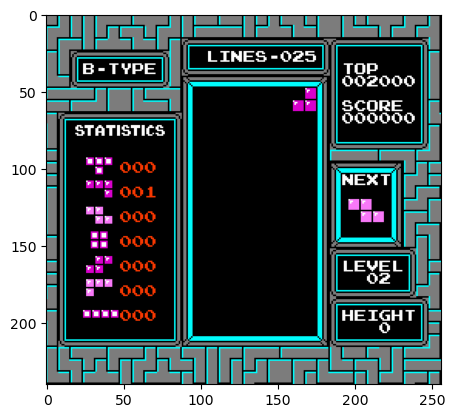

In [41]:
plt.imshow(state)